# Tarea

Dentro de esta carpeta se encuentra un directorio llamado "escuelas_privadas.geojson". Tendras que realizar la lectura, graficas y analisis de alguna de las alcalidas.

In [27]:
import pandas as pd
import geopandas
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

Paso 1. Guarda el geojson en un dataframe e imprimelo. 

In [3]:
df = geopandas.read_file("escuelas_privadas.geojson")
print(df)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

Paso 2. Crea otro gdf con solo las escuelas en la delegacion Miguel Hidalgo

In [5]:
# Filtrar los registros donde la columna "Alcaldía" es igual a "MIGUEL HIDALGO"
dfMG = df[df['alcaldi'] == 'MIGUEL HIDALGO']
print (dfMG)

                                                 nombre  \
0                                 CENDI PART SEDI LOMAS   
11                                  COLEGIO SAN AGUSTIN   
14                          ESTANCIA INFANTIL PRIMAVERA   
19    CENTRO DE DESARROLLO INFANTIL UNA SEMILLA DE L...   
33                                 PROINFANCIA TERESITA   
...                                                 ...   
3581  INSTITUTO MEXICANO DE EDUCACIÓN PRIMARIA Y SEC...   
3620                                  "HUMANITREE HIVE"   
3621               "SECUNDARIA IL MIO MONDO MONTESSORI"   
3644                              DR JAIME TORRES BODET   
3658                                MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
11                   INICIAL  TIEMPO COMPLETO  Particular   
14                   INICIAL         MATUTINO  Particular   
19                   INICIAL  TIEMPO COMPLETO  

Paso 3. Setea el indice para que ahora sea la colonia

In [7]:
# Establecer "Colonia" como índice
dfMG = dfMG.set_index('colonia')

# Imprimir el nuevo DataFrame
print(dfMG)

                                                                      nombre  \
colonia                                                                        
LOMAS DE CHAPULTEPEC                                   CENDI PART SEDI LOMAS   
POLANCO REFORMA (POLANCO)                                COLEGIO SAN AGUSTIN   
ANAHUAC LOS MANZANOS                             ESTANCIA INFANTIL PRIMAVERA   
ANZURES                    CENTRO DE DESARROLLO INFANTIL UNA SEMILLA DE L...   
ANZURES                                                 PROINFANCIA TERESITA   
...                                                                      ...   
ANZURES                    INSTITUTO MEXICANO DE EDUCACIÓN PRIMARIA Y SEC...   
LOMAS DE CHAPULTEPEC                                       "HUMANITREE HIVE"   
ANAHUAC LOS MANZANOS                    "SECUNDARIA IL MIO MONDO MONTESSORI"   
REFORMA SOCIAL                                         DR JAIME TORRES BODET   
POLANCO REFORMA (POLANCO)               

Paso 3. Grafica el dataframe

<Axes: >

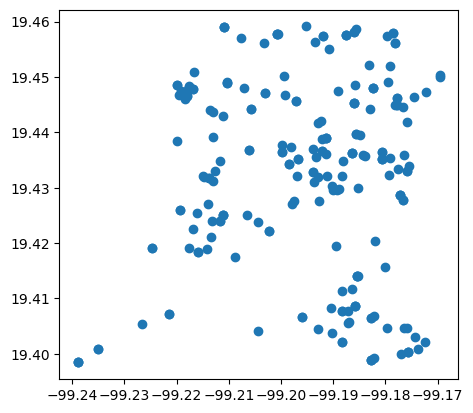

In [8]:
dfMG.plot()

Paso 4. Crea dos nuevas columnas en el gdf original que sean para el area y el perimetro, en ellas haz tu calculo de cada una.

In [13]:
print(dfMG)

                                                                      nombre  \
colonia                                                                        
LOMAS DE CHAPULTEPEC                                   CENDI PART SEDI LOMAS   
POLANCO REFORMA (POLANCO)                                COLEGIO SAN AGUSTIN   
ANAHUAC LOS MANZANOS                             ESTANCIA INFANTIL PRIMAVERA   
ANZURES                    CENTRO DE DESARROLLO INFANTIL UNA SEMILLA DE L...   
ANZURES                                                 PROINFANCIA TERESITA   
...                                                                      ...   
ANZURES                    INSTITUTO MEXICANO DE EDUCACIÓN PRIMARIA Y SEC...   
LOMAS DE CHAPULTEPEC                                       "HUMANITREE HIVE"   
ANAHUAC LOS MANZANOS                    "SECUNDARIA IL MIO MONDO MONTESSORI"   
REFORMA SOCIAL                                         DR JAIME TORRES BODET   
POLANCO REFORMA (POLANCO)               

Paso 5. Crea una nueva columna en el gdf del paso 1 que se llame distancia; después escoge una escuela del data frame y que la nueva columna tenga la distancia de todas las escuelas a la que escogiste 

In [15]:
#Escuela elegida LOMAS DE CHAPULTEPEC                                   CENDI PART SEDI LOMAS 
# Crear un punto para "LOMAS DE CHAPULTEPEC CENDI PART SEDI LOMAS"
punto_lomas_chapultepec = Point(-99.21115, 19.42515)
# Calcular la distancia entre cada punto en 'gdf' y 'punto_lomas_chapultepec'
df['distancia'] = df.geometry.apply(lambda point: point.distance(punto_lomas_chapultepec))

# Imprimir el GeoDataFrame actualizado
print(df)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

Paso 6. Realiza una consulta para saber cuales son las 3 escuelas mas lejos del punto que elegiste, debe imprimir solamente el nombre de las escuelas y su distancia al punto

In [17]:
# Suponiendo que ya tienes el GeoDataFrame 'gdf' con la columna 'distancia'

# Ordenar el GeoDataFrame por la columna 'distancia' de manera descendente
df_ordenado = df.sort_values(by='distancia', ascending=False)

# Tomar las tres escuelas más lejanas
tres_escuelas_mas_lejanas = df_ordenado.head(3)[['colonia', 'distancia']]

# Imprimir los nombres de las escuelas y sus distancias
print(tres_escuelas_mas_lejanas)


                          colonia  distancia
3280  SANTA ANA TLACOTENCO (PBLO)   0.325244
233   SANTA ANA TLACOTENCO (PBLO)   0.325244
1107  SANTA ANA TLACOTENCO (PBLO)   0.325244


Paso 7. Agrupa las escuelas por su alcaldia. Una vez hecho eso crea una nueva geometria que "envuelva" a las escuelas de cada alcaldia y graficalos

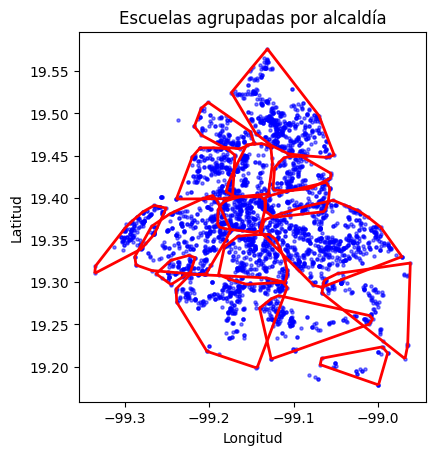

In [24]:

# Agrupar las escuelas por alcaldía
escuelas_por_alcaldia = df.groupby('alcaldi')['geometry'].apply(lambda x: MultiPoint(x.tolist()))

# Crear una nueva geometría que "envuelva" las escuelas de cada alcaldía
geometrias_por_alcaldia = escuelas_por_alcaldia.apply(lambda x: x.convex_hull)

# Crear un nuevo GeoDataFrame con las geometrías por alcaldía
df_por_alcaldia = gpd.GeoDataFrame(geometry=geometrias_por_alcaldia)

# Graficar los resultados
ax = df.plot(alpha=0.5, color='blue', markersize=5)
df_por_alcaldia.boundary.plot(ax=ax, color=None, edgecolor='red', linewidth=2)

# Ajustar según tus necesidades de visualización
ax.set_title('Escuelas agrupadas por alcaldía')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()


El paso anterior guardalo como una capa y graficalo en conjunto a la grafica del paso 1

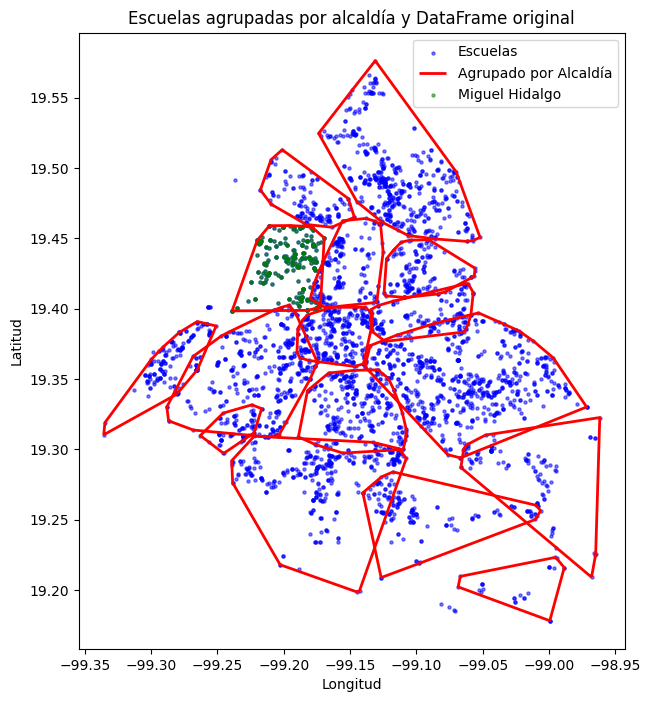

In [38]:
# Guardar el GeoDataFrame con las geometrías por alcaldía como una nueva capa
df_por_alcaldia.to_file("escuelas_por_alcaldia.shp")

# Graficar en conjunto con df.plot() y dfMG.plot()
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar el DataFrame original
df.plot(ax=ax, alpha=0.5, color='blue', markersize=5, label='Escuelas')

# Cargar el GeoDataFrame con geometrías por alcaldía y graficarlo
df_por_alcaldia = gpd.read_file("escuelas_por_alcaldia.shp")
df_por_alcaldia.boundary.plot(ax=ax, color=None, edgecolor='red', linewidth=2, label='Agrupado por Alcaldía')

# Graficar dfMG
dfMG.plot(ax=ax, alpha=0.5, color='green', markersize=5, label='Miguel Hidalgo')

# Ajustar según tus necesidades de visualización
ax.set_title('Escuelas agrupadas por alcaldía y DataFrame original')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend()

# Mostrar el gráfico
plt.show()

Paso 8. Crea una nueva columna en el df inicial llamada 'Calidad_escuela' que imprima un numero aleatorio entre 1 y 10. 
Imprime el gdf


In [31]:
# Extraer las coordenadas de 'geometry' para crear 'longitude' y 'latitude'
df['longitude'] = df['geometry'].x
df['latitude'] = df['geometry'].y

# Agregar la columna 'Calidad_escuela' con números aleatorios entre 1 y 10
df['Calidad_escuela'] = np.random.randint(1, 11, size=len(df))

# Crear el GeoDataFrame a partir del DataFrame 'df'
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Imprimir el GeoDataFrame
print(gdf)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

Paso 9. Ahora, plotea el gdf, pero vusalizando la columna 'Calidad escuela'

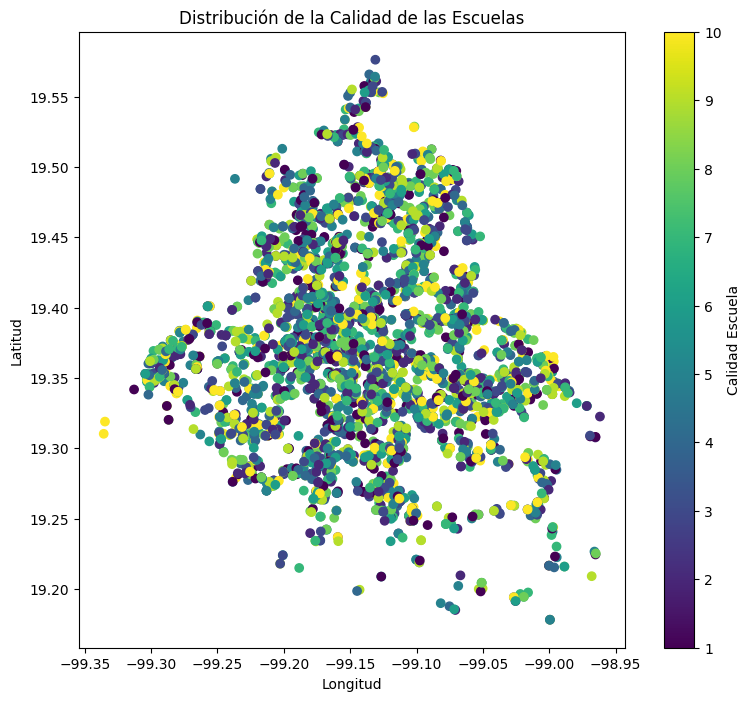

In [32]:
# Graficar el GeoDataFrame considerando la columna 'Calidad_escuela'
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, column='Calidad_escuela', cmap='viridis', legend=True, legend_kwds={'label': "Calidad Escuela"})

# Ajustar según tus necesidades de visualización
ax.set_title('Distribución de la Calidad de las Escuelas')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

Paso 10. Finalmente, plotea en escala de Rojos, en cuantiles de 4 categorias.
Recuerda que los colores deben de ser claros, inserta una leyenda

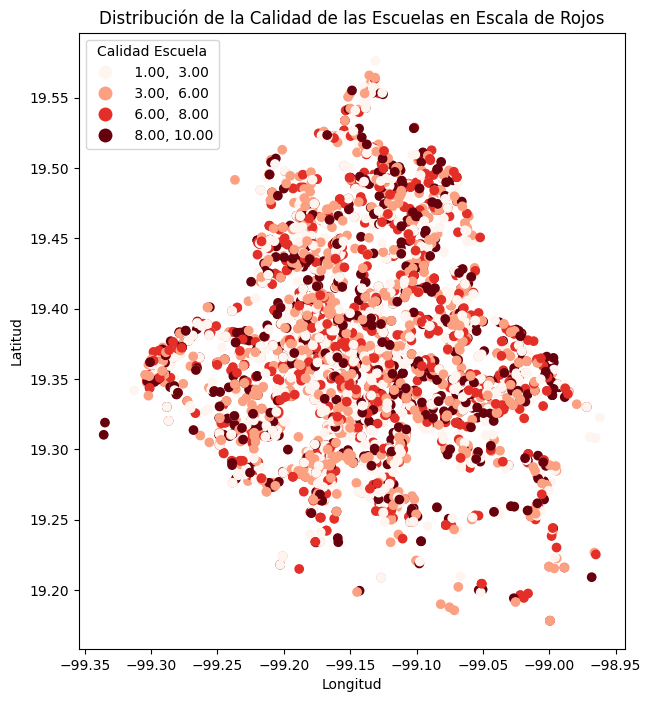

In [35]:
# Graficar el GeoDataFrame en escala de rojos con cuantiles de 4 categorías
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, column='Calidad_escuela', cmap='Reds', scheme='quantiles', k=4, legend=True, legend_kwds={'title': "Calidad Escuela", 'loc':'upper left'})

# Ajustar según tus necesidades de visualización
ax.set_title('Distribución de la Calidad de las Escuelas en Escala de Rojos')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()